In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/My\ Drive/Computer\ Vision/Assignment\ 1

/content/drive/My Drive/Computer Vision/Assignment 1


In [4]:
!ls

Assignment-1.pdf  image_2.png  q1.ipynb  q3.ipynb  q6.ipynb  sharingan.jpg
image_1.jpg	  image_3.png  q2.ipynb  q4.ipynb  q7.ipynb


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [0]:
image = cv2.imread('image_3.png',cv2.IMREAD_GRAYSCALE)

([], <a list of 0 Text yticklabel objects>)

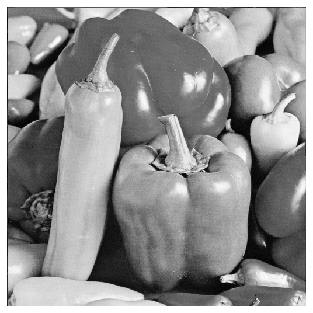

In [7]:
image=image/255
plt.imshow(image,cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])

In [0]:
filter_size = 3
padding = int((filter_size-1)/2)
original_image=image

In [0]:
def downsample(d_image):
    return d_image[::2,::2]

In [0]:
def upsample(u_image):
    up_im = np.zeros((u_image.shape[0]*2, u_image.shape[1]*2))
    up_im[::2,::2] = u_image
    up_im[:,-1] = up_im[:,-2]
    for i in range(0, up_im.shape[0] - 1, 2):
        for j in range(1, up_im.shape[1] - 1, 2):
            up_im[i][j] = (up_im[i][j-1] + up_im[i][j+1])/2
    for i in range(1,up_im.shape[0] - 1, 2):
        up_im[i,:] = (up_im[i-1,:] + up_im[i+1,:])/2
    up_im[-1, :] = up_im[-2, :]
    return up_im

In [0]:
sigma = 10
side = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
x, y = np.meshgrid(side, side)
filter_gauss = np.exp(-(x**2 + y**2) / (2. * sigma**2))
filter_gauss = filter_gauss / np.sum(filter_gauss)

## **Gaussian Pyramid**

In [0]:
# level 1
padded_image = np.zeros((image.shape[0] + 2*padding, image.shape[1] + 2*padding))
padded_image[padding: image.shape[0] + padding, padding: image.shape[1] + padding] = image
new_image = np.zeros(image.shape)
for i in range(padding,image.shape[0] + padding):
    for j in range(padding,image.shape[1] + padding):
        new_image[i-padding][j-padding] = np.sum(padded_image[i-padding:i+padding + 1, j-padding:j+padding + 1]*filter_gauss)
g1 = downsample(new_image)

In [0]:
# level2
image = g1
padded_image = np.zeros((image.shape[0] + 2*padding, image.shape[1] + 2*padding))
padded_image[padding: image.shape[0] + padding, padding: image.shape[1] + padding] = image
new_image = np.zeros(image.shape)
for i in range(padding,image.shape[0] + padding):
    for j in range(padding,image.shape[1] + padding):
        new_image[i-padding][j-padding] = np.sum(padded_image[i-padding:i+padding + 1, j-padding:j+padding + 1]*filter_gauss)
g2 = downsample(new_image)

In [0]:
# level3
image = g2
padded_image = np.zeros((image.shape[0] + 2*padding, image.shape[1] + 2*padding))
padded_image[padding: image.shape[0] + padding, padding: image.shape[1] + padding] = image
new_image = np.zeros(image.shape)
for i in range(padding,image.shape[0] + padding):
    for j in range(padding,image.shape[1] + padding):
        new_image[i-padding][j-padding] = np.sum(padded_image[i-padding:i+padding + 1, j-padding:j+padding + 1]*filter_gauss)
g3 = downsample(new_image)
g0 = original_image

## **Laplacian Pyramid**

In [0]:
l3 = g3

In [0]:
upsampled_im = upsample(g3)
l2 = g2 - upsampled_im

In [0]:
upsampled_im = upsample(g2)
l1 = g1 - upsampled_im

In [0]:
upsampled_im = upsample(g1)
l0 = g0 - upsampled_im

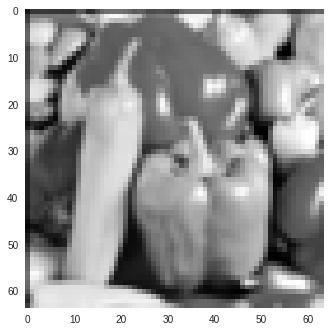

In [23]:
plt.imshow(l3, cmap='gray')
plt.grid(False)